<a href="https://colab.research.google.com/github/helomelo1/GPT_with_Karpathy/blob/main/micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
def f(x):
  return 3*x**2 - 4*x + 5

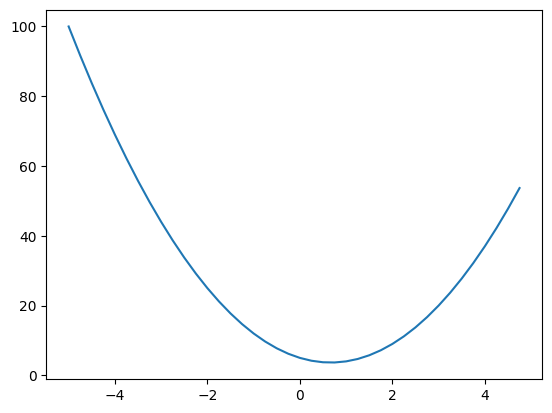

In [103]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [104]:
a = 2.0
b = -1.4
c = 15.0
d = a * b + c
print(d)

12.2


In [105]:
h = 0.000000001

a = 2.0
b = -1.4
c = 15.0

d1 = a * b + c
c += h
d2 = a * b + c

print(d1)
print(d2)
print("slope:",(d2 - d1) / h)

12.2
12.200000001
slope: 1.000000082740371


In [106]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._backward = lambda: None
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward

        return out

In [107]:
a = Value(2.0)
b = Value(-1.4)
c = Value(11)
d = a * b
e = d + c
f = Value(1.6)
g = e * f

In [108]:
a.label = 'a'
b.label = 'b'
c.label = 'c'
d.label = 'd'
e.label = 'e'
f.label = 'f'
g.label = 'g'

In [109]:
d._op

'*'

In [110]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [111]:
a.grad = -2.24
b.grad = 3.2
c.grad = 1.6
d.grad = 1.6
e.grad = 1.6
f.grad = 8.2
g.grad = 1.0

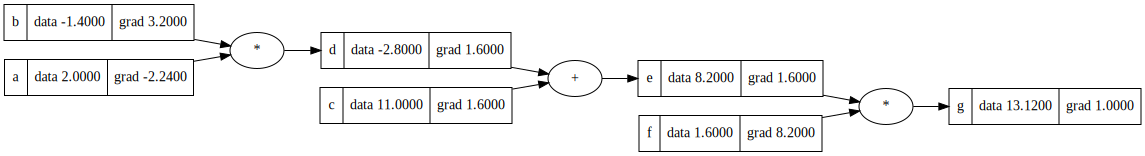

In [112]:
draw_dot(g)

In [113]:
def func():
    h = 0.00001

    a = Value(2.0)
    b = Value(-1.4)
    c = Value(11)
    d = a * b
    e = d + c
    f = Value(1.6)
    g1 = e * f

    a = Value(2.0)
    b = Value(-1.4)
    c = Value(11)
    d = a * b
    e = d + c
    f = Value(1.6 + h)
    g2 = e * f

    print((g2.data - g1.data) / h)

func()

8.200000000080365


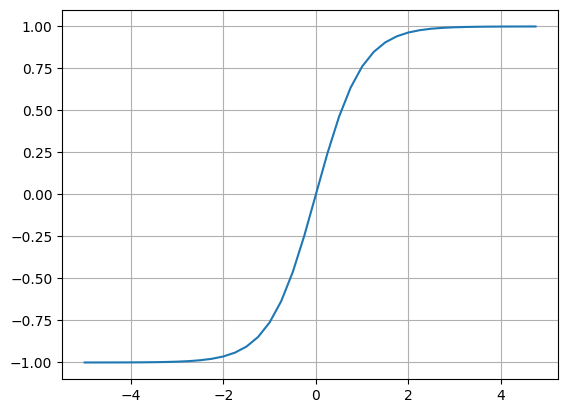

In [114]:
plt.plot(np.arange(-5, 5, 0.25), np.tanh(np.arange(-5, 5, 0.25))); plt.grid();

In [115]:
x1 = Value(1.6, label = 'x1')
x2 = Value(2.3, label = 'x2')

w1 = Value(2.0, label = 'w1')
w2 = Value(-1.4, label = 'w2')

b = Value(0.1, label = 'b')

x1w1 = x1 * w1
x2w2 = x2 * w2

x1w1.label = 'x1w1'
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1+x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'

In [119]:
n._backward()

In [123]:
x1w1x2w2._backward()

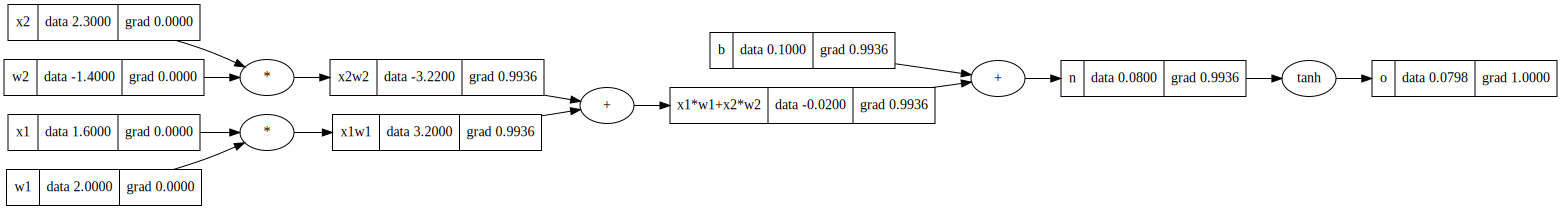

In [124]:
draw_dot(o)

In [125]:
o.grad = 1.0
o._backward()